## <u>Python for AI-ML</u>

# Module 4 - Data Preprocessing

# Use Case-1: Bello Fashions


### Problem Statement
The data analysis team has been given a task to analyze the monthly sales by the manager.

### Import Basic Libraries

In [1]:
!pip install pandas_profiling==3.1.0

     |████████████████████████████████| 261 kB 4.8 MB/s 
     |████████████████████████████████| 675 kB 37.7 MB/s 
     |████████████████████████████████| 10.1 MB 41.7 MB/s 
     |████████████████████████████████| 102 kB 9.3 MB/s 
     |████████████████████████████████| 62 kB 771 kB/s 
     |████████████████████████████████| 3.1 MB 51.5 MB/s 
     |████████████████████████████████| 596 kB 58.6 MB/s 
     |████████████████████████████████| 303 kB 73.1 MB/s 
     |████████████████████████████████| 812 kB 49.3 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a64ec779768456e6ed82419f40094a198214bcfc885f01559eb5e3bb8beafc72
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=c9b3e4d24bdb29f478eb2a1d36b5b94628147a6fe7412b30f1805d732f6188fd
  

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Downloading and unzip the data
!wget https://www.dropbox.com/s/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip
!unzip "Pandas Data preprocessing.zip"
!rm "Pandas Data preprocessing.zip"

--2021-11-24 11:27:07--  https://www.dropbox.com/s/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip [following]
--2021-11-24 11:27:07--  https://www.dropbox.com/s/raw/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc08627879b9344383a01733d4c0.dl.dropboxusercontent.com/cd/0/inline/Bak-wSEBt3FJcKHxTrmLqgzplVTvYyXBwY1gMs5Ax2mhbE2L6nKgqgDK6ci-kRm4DgKK-HRXLGG36ROeM_iW4o1nGvPMxx75kejhXI0peDmLtZkeQ59ryXIvn0Fhe3DeCJT3MN1h4gHw1v413ILDXriG/file# [following]
--2021-11-24 11:27:07--  https://uc08627879b9344383a01733d4c0.dl.dropboxusercontent.com/cd/0/inline/Bak-wSEBt3FJcKHxTrmLqgzplVT

### Reading Data from Multiple Sources

Richard reads data from multiple sources using pandas and merges into a single flat file(CSV). Later, he shares this file to Robin to perform the Data Analyst.

In [4]:
from sqlalchemy import create_engine

In [ ]:
"""
import shutil
import os
os.mkdir("DB Folder")
shutil.move("/content/db_bello_customers.db", "/content/DB Folder/db_bello_customers.db")
engine=create_engine('sqlite:////content/DB Folder/db_bello_customers.db',future=True)
"""

'\nimport shutil\nimport os\nos.mkdir("DB Folder")\nshutil.move("/content/db_bello_customers.db", "/content/DB Folder/db_bello_customers.db")\nengine=create_engine(\'sqlite:////content/DB Folder/db_bello_customers.db\',future=True)\n'

In [6]:
engine=create_engine('sqlite:///db_bello_customers.db',future=True)

In [7]:
type(engine)

sqlalchemy.future.engine.Engine

In [8]:
connect = engine.connect() # connects database
type(connect) # creates a database file

sqlalchemy.future.engine.Connection

In [9]:
on_premise_db=pd.read_sql_table('Payments',connect)

In [10]:
type(on_premise_db)

pandas.core.frame.DataFrame

In [11]:
on_premise_db.head()

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [12]:
#read from csv file
cld_data=pd.read_csv('https://raw.githubusercontent.com/SameerJain901/datasets/master/cld_bello_customers.csv')

In [13]:
lcl_data=pd.read_excel('/content/lcl_bello_sales.xlsx')

In [14]:
on_premise_db.head()

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [15]:
lcl_data.head()

,CustomerID,Price
0,10471,₹ 675036.2138626401
1,10472,"€ 2,315.53"
2,10473,₹ 611426.29122378
3,10474,₹ 210869.48083470002
4,10475,₹ 679422.2811434


In [16]:
cld_data.head()

,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,10471,coates,1 start,8736,Creditcard
1,10472,dresses,2 star,8547,Ewallet
2,10473,NaN,2 star,9833,Prepaid Card
3,10474,dresses,2star,7591,Directdeposit
4,10475,pantas,1 start,5131,NaN


In [17]:
# Checking shape of all the DataFrames
lcl_data.shape,cld_data.shape,on_premise_db.shape

((100, 2), (100, 5), (100, 6))

In [18]:
# Remove the columns CustomerID from other two DataFrames as they are present in cld_data
lcl_data.drop('CustomerID',axis=1,inplace=True)
on_premise_db.drop('CustomerID',axis=1,inplace=True)

Now, we have to merge them into one single file so that Robin can analyze the data.

In [19]:
data=pd.concat([cld_data,on_premise_db,lcl_data],axis=1)

In [20]:
data.shape

(100, 11)

In [21]:
data.head()

,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode,Date,PaymentMode,ShippingMode,Gender,ShippingTime,Price
0,10471,coates,1 start,8736,Creditcard,16/08/20,Creditcard,Economy,Female,17.0,₹ 675036.2138626401
1,10472,dresses,2 star,8547,Ewallet,2/8/2020 0:00,Ewallet,Mail,Unspecified,12.0,"€ 2,315.53"
2,10473,NaN,2 star,9833,Prepaid Card,8/8/2020 0:00,Prepaid Card,Mail,None,10.0,₹ 611426.29122378
3,10474,dresses,2star,7591,Directdeposit,None,Directdeposit,Normal,Female,2133.0,₹ 210869.48083470002
4,10475,pantas,1 start,5131,NaN,24/08/20,None,Economy,Male,2133.0,₹ 679422.2811434


In [22]:
data.reset_index()

,index,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode,Date,PaymentMode,ShippingMode,Gender,ShippingTime,Price
0,0,10471,coates,1 start,8736,Creditcard,16/08/20,Creditcard,Economy,Female,17.0,₹ 675036.2138626401
1,1,10472,dresses,2 star,8547,Ewallet,2/8/2020 0:00,Ewallet,Mail,Unspecified,12.0,"€ 2,315.53"
2,2,10473,NaN,2 star,9833,Prepaid Card,8/8/2020 0:00,Prepaid Card,Mail,None,10.0,₹ 611426.29122378
3,3,10474,dresses,2star,7591,Directdeposit,None,Directdeposit,Normal,Female,2133.0,₹ 210869.48083470002
4,4,10475,pantas,1 start,5131,NaN,24/08/20,None,Economy,Male,2133.0,₹ 679422.2811434
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,10566,Coats/Jackets,2star,6090,Prepaid Card,4/8/2020 0:00,Prepaid Card,Express,Female,5.0,£ 1148.1217405
96,96,10567,coates,5 star,9433,Mobile,16/08/20,Mobile,Normal,Unspecified,13.0,₹ 127655.91325387999
97,97,10568,pantas,3 star,7354,Credit Card,25/08/20,Credit Card,Normal,Female,10.0,₹ 577078.47118378
98,98,10569,Pants,5 star,5200,Directdeposit,26/08/20,Directdeposit,Economy,Male,-2131.0,£ 4118.0053827500005


In [23]:
data.reset_index(inplace=True)

In [24]:
data.head()

,index,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode,Date,PaymentMode,ShippingMode,Gender,ShippingTime,Price
0,0,10471,coates,1 start,8736,Creditcard,16/08/20,Creditcard,Economy,Female,17.0,₹ 675036.2138626401
1,1,10472,dresses,2 star,8547,Ewallet,2/8/2020 0:00,Ewallet,Mail,Unspecified,12.0,"€ 2,315.53"
2,2,10473,NaN,2 star,9833,Prepaid Card,8/8/2020 0:00,Prepaid Card,Mail,None,10.0,₹ 611426.29122378
3,3,10474,dresses,2star,7591,Directdeposit,None,Directdeposit,Normal,Female,2133.0,₹ 210869.48083470002
4,4,10475,pantas,1 start,5131,NaN,24/08/20,None,Economy,Male,2133.0,₹ 679422.2811434


In [25]:
# Arrange the columns
data=data[['Date','CustomerID','ProductType','Rating','Total_Ratings','Gender',
                                'PaymentMode','ShippingMode','ShippingTime','Price']]

In [26]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,NaN,2 star,9833,None,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
3,None,10474,dresses,2star,7591,Female,Directdeposit,Directdeposit,Normal,2133.0,₹ 210869.48083470002
4,24/08/20,10475,pantas,1 start,5131,Male,NaN,None,Economy,2133.0,₹ 679422.2811434


#### Data dictionary for the data

![image.png](attachment:image.png)

In [27]:
# Saving the data
data.to_csv('Bello_Customers.csv',index=False)

### Duplicate Entries

In [28]:
uncleaned=pd.read_csv('Bello_Customers.csv')

In [29]:
data=uncleaned.copy()

In [30]:
# Returns boolean series denoting duplicate rows
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [31]:
data.duplicated().any()

True

In [32]:
# Let's see which rows are duplicates
data[data.duplicated()]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
88,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Credit Card,Normal,11.0,₹ 234895.78095268
89,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Credit Card,Normal,11.0,₹ 234895.78095268


In [33]:
# original entry
data.iloc[87,:]

Date                      31/08/20
CustomerID                   10558
ProductType                 coates
Rating                      5 star
Total_Ratings                 7007
Gender                 Unspecified
PaymentMode            Credit Card
PaymentMode.1          Credit Card
ShippingMode                Normal
ShippingTime                    11
Price            ₹ 234895.78095268
Name: 87, dtype: object

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           99 non-null     object 
 1   CustomerID     100 non-null    int64  
 2   ProductType    96 non-null     object 
 3   Rating         94 non-null     object 
 4   Total_Ratings  100 non-null    int64  
 5   Gender         95 non-null     object 
 6   PaymentMode    94 non-null     object 
 7   PaymentMode.1  94 non-null     object 
 8   ShippingMode   97 non-null     object 
 9   ShippingTime   99 non-null     float64
 10  Price          99 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.7+ KB


In [35]:
data["CustomerID"] == 10558

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: CustomerID, Length: 100, dtype: bool

In [36]:
# how can i return based in customer id 10558
data[data["CustomerID"] == 10558]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
87,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Credit Card,Normal,11.0,₹ 234895.78095268
88,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Credit Card,Normal,11.0,₹ 234895.78095268
89,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Credit Card,Normal,11.0,₹ 234895.78095268


In [37]:
# Dropping duplicate entries where inplace attribute ensures that the change is updated in the DataFrame 
data.drop_duplicates(inplace=True)

In [38]:
# What would be the total ratings if duplicates entries were there?
uncleaned.Total_Ratings.sum()

756115

In [39]:
# Price after removing duplicate entries
data.Total_Ratings.sum()

742101

In [40]:
# Difference between the ratings
uncleaned.Total_Ratings.sum()-data.Total_Ratings.sum()

14014

Even the change after dropping duplicates seems very little, it generates inconsistent results and would have been harmful to the industry in the long run.

### Shipping Time

https://students.flinders.edu.au/content/dam/student/slc/box-and-whisker-plots.pdf

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


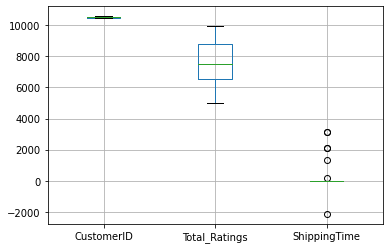

In [41]:
# As discussed, we know that we can remove outliers using boxplot and IQR
data.boxplot()

As you can see there are 5 extreme entries in the data that should be removed. Shipping time cannot be negative as well.

In [42]:
# Pandas allows you to get quantiles using quantile function
Q1 = data['ShippingTime'].quantile(0.25)
Q3 = data['ShippingTime'].quantile(0.75)
IQR = Q3 - Q1

In [43]:
print('The IQR value is',IQR)

The IQR value is 9.0


In [44]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,NaN,2 star,9833,NaN,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
3,NaN,10474,dresses,2star,7591,Female,Directdeposit,Directdeposit,Normal,2133.0,₹ 210869.48083470002
4,24/08/20,10475,pantas,1 start,5131,Male,NaN,NaN,Economy,2133.0,₹ 679422.2811434


In [45]:
(data["CustomerID"] == 10471) | (data["ShippingMode"] == "Normal")

0      True
1     False
2     False
3      True
4     False
      ...  
95    False
96     True
97     True
98    False
99    False
Length: 98, dtype: bool

In [46]:
data[(data["CustomerID"] == 10471) | (data["ShippingMode"] == "Normal")]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Creditcard,Economy,17.0,₹ 675036.2138626401
3,NaN,10474,dresses,2star,7591,Female,Directdeposit,Directdeposit,Normal,2133.0,₹ 210869.48083470002
22,4/8/2020 0:00,10493,Pants,4 star,6943,Unspecified,Ewallet,Ewallet,Normal,17.0,₹ 634808.1963701401
30,31/08/20,10501,pantas,4 star,6569,NaN,Creditcard,Creditcard,Normal,9.0,₹ 581033.69733056
31,30/08/20,10502,NaN,3 star,8823,Female,Ewallet,Ewallet,Normal,16.0,"€ 5,242.22"
33,24/08/20,10504,NaN,1 start,5037,Female,Ewallet,Ewallet,Normal,14.0,"€ 5,546.63"
45,25/08/20,10516,Jeans,3 star,7033,Male,NaN,NaN,Normal,14.0,₹ 167727.12548098
46,29/08/20,10517,Hats,5 star,7532,Female,Credit Card,Credit Card,Normal,7.0,"$3,124.78"
47,21/08/20,10518,Jeans,2star,7285,Female,Creditcard,Creditcard,Normal,14.0,"€ 2,773.90"
48,20/08/20,10519,Jeans,2star,7678,Unspecified,Ewallet,Ewallet,Normal,18.0,₹ 159529.19686752


In [47]:
# Let's see which entries are outliers
outliers=data[(data.ShippingTime < (Q1 - 1.5 * IQR)) |(data.ShippingTime > (Q3 + 1.5 * IQR))]

In [48]:
outliers

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
3,NaN,10474,dresses,2star,7591,Female,Directdeposit,Directdeposit,Normal,2133.0,₹ 210869.48083470002
4,24/08/20,10475,pantas,1 start,5131,Male,NaN,NaN,Economy,2133.0,₹ 679422.2811434
27,19/08/20,10498,Coats/Jackets,3 star,9297,Unspecified,Direct Deposit,Direct Deposit,Express,213.0,₹ 635118.07344224
43,14/08/20,10514,dresses,5 star,5567,Unspecified,Credit Card,Credit Card,Express,1321.0,"€ 7,261.79"
59,17/08/20,10530,Cardigan,4 star,6930,Female,Cash,Cash,Economy,3113.0,"$8,670.69"
71,20/08/20,10542,Hats,2star,9157,Male,Cash,Cash,Mail,3132.0,₹ 708227.40839738
98,26/08/20,10569,Pants,5 star,5200,Male,Directdeposit,Directdeposit,Economy,-2131.0,£ 4118.0053827500005


In [49]:
# Dropping these entries
data.drop([3,4,27,43,59,71,98],axis=0,inplace=True)

In [50]:
# Alternatively
#data.drop(outliers.index,axis=0,inplace=True)

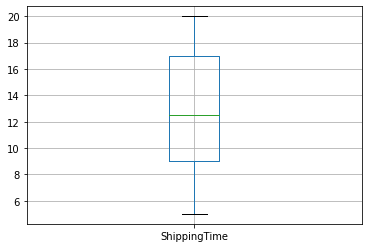

In [51]:
# No outliers present in the data
data.boxplot(column='ShippingTime') # You can also specify the names of columns you want to plot for.

In [52]:
# Let's check the total shipping time before and after remvoging outliers
print('Before: ', round(uncleaned.ShippingTime.mean(),3))
print('After: ',round(data.ShippingTime.mean(),3))
print('Difference: ',round(uncleaned.ShippingTime.mean()-data.ShippingTime.mean(),3))

Before:  112.02
After:  12.822
Difference:  99.198


That is really extreme change in values. This would have caused serious harm to the company.

In [53]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,NaN,2 star,9833,NaN,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,NaN
6,8/8/2020 0:00,10477,coates,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [54]:
# &
data[(data["Gender"] == "Female") & (data["ShippingMode"] == "Mail")]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,NaN
11,18/08/20,10482,pantas,5 star,7816,Female,Mobile Payment,Mobile Payment,Mail,10.0,"€ 6,580.20"
14,20/08/20,10485,dresses,1 start,9030,Female,Mobile,Mobile,Mail,7.0,"$9,743.11"
17,17/08/20,10488,Dresses,5 star,7659,Female,Ewallet,Ewallet,Mail,10.0,"$1,991.18"
39,16/08/20,10510,dresses,1 start,7287,Female,Prepaid Card,Prepaid Card,Mail,20.0,₹ 217387.35303316
51,12/8/2020 0:00,10522,coates,1 start,9686,Female,Credit Card,Credit Card,Mail,9.0,"$1,813.71"
72,30/08/20,10543,Coats/Jackets,4 star,7100,Female,Mobile,Mobile,Mail,19.0,"$6,425.44"
84,23/08/20,10555,coates,1 start,8399,Female,Prepaid Card,Prepaid Card,Mail,14.0,"$2,528.42"


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


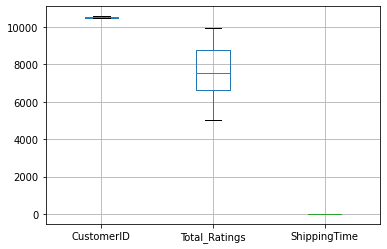

In [55]:
data.boxplot()

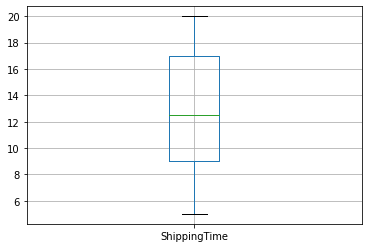

In [56]:
data.boxplot(column="ShippingTime")

### Empty Records/Values

In [57]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,NaN,2 star,9833,NaN,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,NaN
6,8/8/2020 0:00,10477,coates,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [58]:
data.isnull().values.any()

True

In [59]:
# Let's see if there are any null values or not
data.isnull().values.any()

True

In [60]:
data.sort_values(by="ShippingTime",ascending=False)

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
39,16/08/20,10510,dresses,1 start,7287,Female,Prepaid Card,Prepaid Card,Mail,20.0,₹ 217387.35303316
20,5/8/2020 0:00,10491,Coats/Jackets,1 start,9714,Female,Prepaid Card,Prepaid Card,Economy,20.0,"€ 1,514.11"
41,2/8/2020 0:00,10512,pantas,2star,6416,Male,Creditcard,Creditcard,Economy,20.0,£ 5925.050872750001
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,NaN
25,8/8/2020 0:00,10496,Hats,4 star,6594,Male,Prepaid Card,Prepaid Card,Express,20.0,£ 4564.22450475
...,...,...,...,...,...,...,...,...,...,...,...
82,23/08/20,10553,Shirts/Tops,3 star,8175,Unspecified,Credit Card,Credit Card,Express,5.0,₹ 388459.65750934
93,18/08/20,10564,Dresses,2star,9142,Female,Creditcard,Creditcard,Normal,5.0,₹ 325580.74608394003
95,4/8/2020 0:00,10566,Coats/Jackets,2star,6090,Female,Prepaid Card,Prepaid Card,Express,5.0,£ 1148.1217405
53,26/08/20,10524,Dresses,3 star,6654,Male,Direct Deposit,Direct Deposit,Normal,5.0,₹ 442385.73497213994


In [61]:
sum(data["ShippingTime"].isnull())

1

In [62]:
# Preparing a function that returns information on missing values
def check_miss(data):
    '''
    Returns a sorted DataFrame that contains information about missing values in each column.
    Null Values: Either the column has null values or not.
    Count_Nulls: Number of null values
    Percentage_Nulls: Percentage of null values
    '''
    cnull=[sum(data[y].isnull()) for y in data.columns]
    miss=pd.DataFrame({'Col_name':data.columns,'Null Values':
                        [any(data[x].isnull()) for x in data.columns],
                    'Count_Nulls':cnull,
                    'Percentage_Nulls':list((np.array(cnull)*100)/data.shape[0]),
                    'DataType':list(data[x].dtype for x in data.columns)
                      })
    return miss.sort_values(by='Count_Nulls',ascending=False)

In [63]:
check_miss(data)

,Col_name,Null Values,Count_Nulls,Percentage_Nulls,DataType
3,Rating,True,6,6.593407,object
5,Gender,True,5,5.494505,object
6,PaymentMode,True,5,5.494505,object
7,PaymentMode.1,True,5,5.494505,object
2,ProductType,True,4,4.395604,object
8,ShippingMode,True,3,3.296703,object
9,ShippingTime,True,1,1.098901,float64
10,Price,True,1,1.098901,object
0,Date,False,0,0.000000,object
1,CustomerID,False,0,0.000000,int64


Almost every column has missing values.

In [64]:
# Data with no dates should be deleted 
# It seams we have already dealt with the data with no dates
data[data.Date.isna()]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price


##### Missingno Library

In [65]:
# Please wait while the library is installed
!pip install missingno --quiet --disable-pip-version-check

In [66]:
import missingno as mn

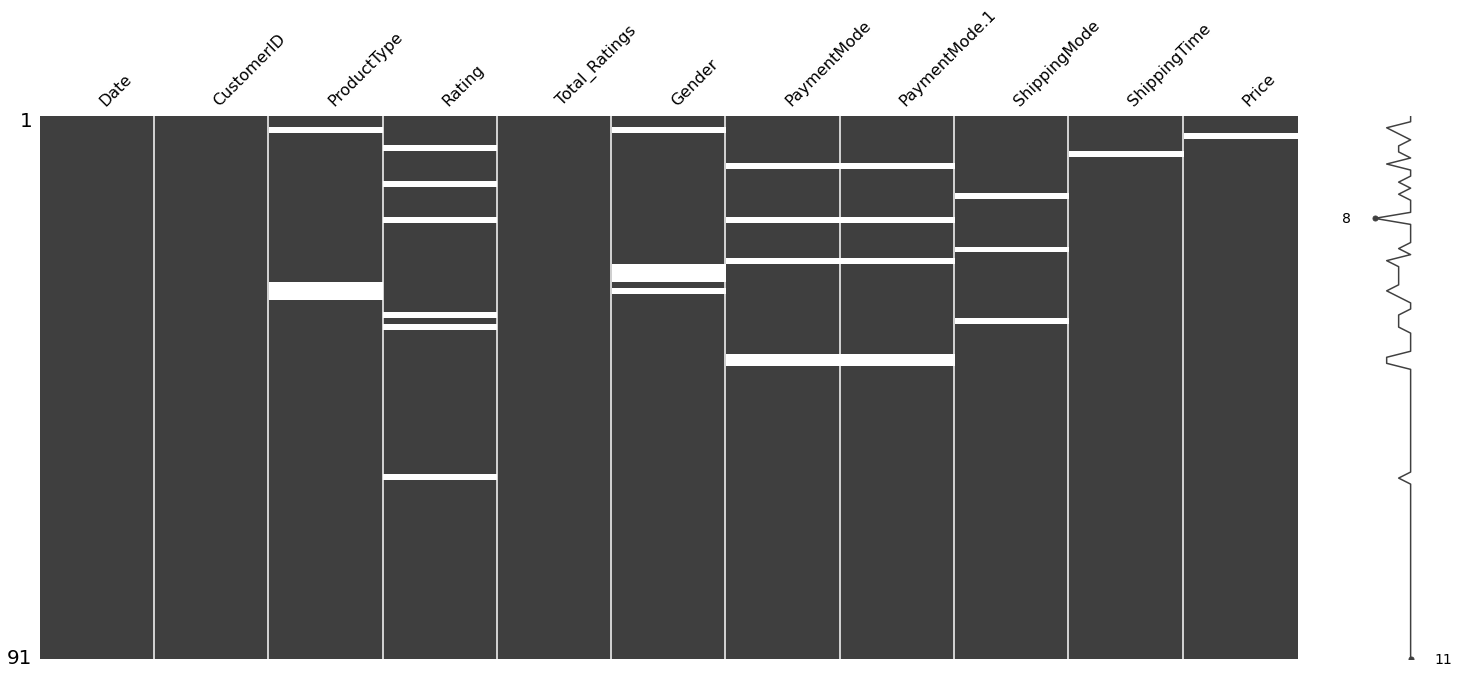

In [67]:
mn.matrix(data)

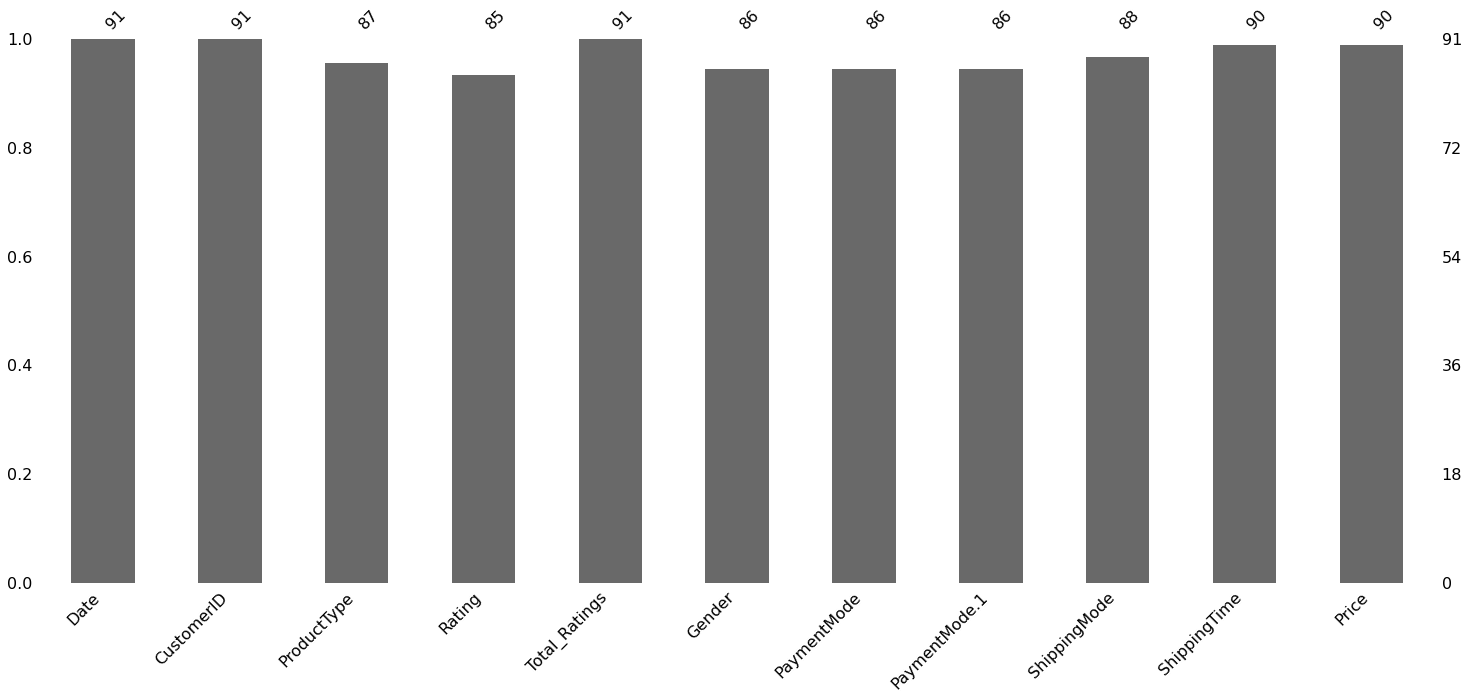

In [68]:
mn.bar(data)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   ProductType    87 non-null     object 
 3   Rating         85 non-null     object 
 4   Total_Ratings  91 non-null     int64  
 5   Gender         86 non-null     object 
 6   PaymentMode    86 non-null     object 
 7   PaymentMode.1  86 non-null     object 
 8   ShippingMode   88 non-null     object 
 9   ShippingTime   90 non-null     float64
 10  Price          90 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.5+ KB


In [70]:
# First we have to change the DataTypes for all the required columns
data.ProductType=data.ProductType.astype('string')
data.PaymentMode=data.PaymentMode.astype('string')
data.Rating=data.Rating.astype('category')
data.Gender=data.Gender.astype('category')
data.PaymentMode=data.PaymentMode.astype('category')
data.ShippingMode=data.ShippingMode.astype('string')
data.Price=data.Price.astype('string')

In [71]:
data["ProductType"].mode()[0]

'coates'

In [72]:
data.PaymentMode.mode()[0]

'Direct Deposit'

In [73]:
# ProductType, and PaymentMode can be filled with mode
# While State can be filled with NA, Gender with Unspecified
# We can fill Price with mean values as we have made a sale for that day
data.ProductType.fillna(data.ProductType.mode()[0],inplace=True)
data.PaymentMode.fillna(data.PaymentMode.mode()[0],inplace=True)
data.Gender.fillna('Unspecified',inplace=True)
data.Rating.fillna(data.Rating.mode()[0],inplace=True)
data.ShippingMode.fillna(data.ShippingMode.mode()[0],inplace=True)
data.ShippingTime.fillna(data.ShippingTime.mean(),inplace=True)

In [74]:
# Checking for missing data again
check_miss(data)

,Col_name,Null Values,Count_Nulls,Percentage_Nulls,DataType
7,PaymentMode.1,True,5,5.494505,object
10,Price,True,1,1.098901,string
0,Date,False,0,0.000000,object
1,CustomerID,False,0,0.000000,int64
2,ProductType,False,0,0.000000,string
3,Rating,False,0,0.000000,category
4,Total_Ratings,False,0,0.000000,int64
5,Gender,False,0,0.000000,category
6,PaymentMode,False,0,0.000000,category
8,ShippingMode,False,0,0.000000,string


In [75]:
# What if we used unclean data? How many Product Types would be?
print('ProductType Before: ',uncleaned.ProductType.unique())

ProductType Before:  ['coates' 'dresses ' nan 'pantas' 'Coats/Jackets' 'Jeans' 'Pants'
 'Cardigan' 'Dresses' 'Shirts/Tops' 'Hats']


In [76]:
print('ProductType After: ',data.ProductType.unique())

ProductType After:  <StringArray>
[       'coates',      'dresses ', 'Coats/Jackets',         'Jeans',
        'pantas',         'Pants',      'Cardigan',       'Dresses',
   'Shirts/Tops',          'Hats']
Length: 10, dtype: string


We had an additional product type which is nan(np.nan/null value). This would have created inconsistencies in analysis. We still have to fill empty Price column but it is quite hard due to different currencies.

### Manipulating Values

There are typos in the ProductType. There can be in other categorical columns as well.

In [77]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,coates,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>
6,8/8/2020 0:00,10477,coates,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [78]:
def find_unique(data,cols):
    '''
    Returns a DataFrame that contains information about unique values for the column names provided.
    data: DataFrame
    cols: list of column names
    '''
    cnull=[sum(data[y].isnull()) for y in data.columns]
    uq=pd.DataFrame({'Col_name':cols,
                     'Count_':list(len(data[x].unique()) for x in cols),
                    'Unique':list(data[x].unique() for x in cols),
                      })
    return uq

In [79]:
unq=find_unique(data,['ProductType','PaymentMode','Gender','Rating','ShippingMode'])
unq

,Col_name,Count_,Unique
0,ProductType,10,"[coates, dresses , Coats/Jackets, Jeans, panta..."
1,PaymentMode,9,"['Creditcard', 'Ewallet', 'Prepaid Card', 'Dir..."
2,Gender,3,"['Female', 'Unspecified', 'Male'] Categories (..."
3,Rating,6,"['1 start', '2 star', '5 star', '4 star', '2st..."
4,ShippingMode,4,"[Economy, Mail, Express, Normal]"


Rating, ProductType and PaymentMode has typos.

In [80]:
print('ProductType: ',*unq.iloc[0,2],sep=' | ')
print('PaymentMode: ',*unq.iloc[1,2],sep=' | ')
print('Rating: ',*unq.iloc[3,2],sep=' | ')

ProductType:  | coates | dresses  | Coats/Jackets | Jeans | pantas | Pants | Cardigan | Dresses | Shirts/Tops | Hats
PaymentMode:  | Creditcard | Ewallet | Prepaid Card | Direct Deposit | Mobile Payment | Cash | Mobile | Credit Card | Directdeposit
Rating:  | 1 start | 2 star | 5 star | 4 star | 2star | 3 star


Typing errors: 
- __coates__ should be _Coats/Jackets_
- __dresses__ should be _Dresses_
- __pantas__ should be _Pants_
- __Creditcard__ should be _Credit Card_
- __Directdeposit__ should be _Direct Deposit_
- __2star__ should be _2 star_

In [81]:
# Manipulating the values
def change(i):
    if i=='coates':
        return 'Coats/Jackets'
    elif i=='dresses ':
        return 'Dresses'
    elif i=='pantas':
        return 'Pants'
    else:
        return i
def change2(i):
    if i=='Creditcard':
        return 'Credit Card'
    elif i=='Directdeposit':
        return 'Direct Deposit'
    else:
        return i
def change_rating(i):
    if i=='2star':
        return '2 star'
    elif i=='1 start':
        return '1 star'
    else:
        return i
        
data.PaymentMode=data.PaymentMode.apply(change2)
data.ProductType=data.ProductType.apply(change)
data.Rating=data.Rating.apply(change_rating)

In [82]:
find_unique(data,['ProductType','PaymentMode','Gender','Rating','ShippingMode'])

,Col_name,Count_,Unique
0,ProductType,7,"[Coats/Jackets, Dresses, Jeans, Pants, Cardiga..."
1,PaymentMode,7,"[Credit Card, Ewallet, Prepaid Card, Direct De..."
2,Gender,3,"['Female', 'Unspecified', 'Male'] Categories (..."
3,Rating,5,"[1 star, 2 star, 5 star, 4 star, 3 star]"
4,ShippingMode,4,"[Economy, Mail, Express, Normal]"


In [83]:
data["ProductType"].unique()

array(['Coats/Jackets', 'Dresses', 'Jeans', 'Pants', 'Cardigan',
       'Shirts/Tops', 'Hats'], dtype=object)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           91 non-null     object  
 1   CustomerID     91 non-null     int64   
 2   ProductType    91 non-null     object  
 3   Rating         91 non-null     object  
 4   Total_Ratings  91 non-null     int64   
 5   Gender         91 non-null     category
 6   PaymentMode    91 non-null     object  
 7   PaymentMode.1  86 non-null     object  
 8   ShippingMode   91 non-null     string  
 9   ShippingTime   91 non-null     float64 
 10  Price          90 non-null     string  
dtypes: category(1), float64(1), int64(2), object(5), string(2)
memory usage: 8.0+ KB


In [85]:
# we will have to work with dates as well
data.Date=pd.to_datetime(data.Date,dayfirst=True)

In [86]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   ProductType    91 non-null     object        
 3   Rating         91 non-null     object        
 4   Total_Ratings  91 non-null     int64         
 5   Gender         91 non-null     category      
 6   PaymentMode    91 non-null     object        
 7   PaymentMode.1  86 non-null     object        
 8   ShippingMode   91 non-null     string        
 9   ShippingTime   91 non-null     float64       
 10  Price          90 non-null     string        
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4), string(2)
memory usage: 8.0+ KB


### Grouping

Robin has to calculate average shipping time for each product type. Let's see how can he do this:

In [88]:
data.groupby("ProductType")["ShippingTime"].mean()

ProductType
Cardigan         11.333333
Coats/Jackets    12.653846
Dresses          13.473684
Hats             13.000000
Jeans            11.200000
Pants            14.485185
Shirts/Tops      12.500000
Name: ShippingTime, dtype: float64

In [89]:
#mean,min,max
#agg([])

In [90]:
g = data.groupby("ProductType")["ShippingTime"]
g.max()

ProductType
Cardigan         16.0
Coats/Jackets    20.0
Dresses          20.0
Hats             20.0
Jeans            18.0
Pants            20.0
Shirts/Tops      20.0
Name: ShippingTime, dtype: float64

In [91]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [92]:
type(df.groupby("Animal").mean())

pandas.core.frame.DataFrame

In [93]:
df.groupby("Animal").agg([np.mean,max,min])

Max Speed              
            mean    max    min
Animal                        
Falcon     375.0  380.0  370.0
Parrot      25.0   26.0   24.0

In [94]:
print('Average shipping time for each product type: ')
data.groupby('ProductType')["ShippingTime"].agg([np.mean,max,min])

Average shipping time for each product type: 


,mean,max,min
ProductType,,,
Cardigan,11.333333,16.0,6.0
Coats/Jackets,12.653846,20.0,5.0
Dresses,13.473684,20.0,5.0
Hats,13.000000,20.0,7.0
Jeans,11.200000,18.0,5.0
Pants,14.485185,20.0,9.0
Shirts/Tops,12.500000,20.0,5.0


In [95]:
print('Average shipping time for each product type: ')
data.groupby('ProductType')["ShippingTime"].agg(np.mean)

Average shipping time for each product type: 


ProductType
Cardigan         11.333333
Coats/Jackets    12.653846
Dresses          13.473684
Hats             13.000000
Jeans            11.200000
Pants            14.485185
Shirts/Tops      12.500000
Name: ShippingTime, dtype: float64

In [96]:
# checking groups present in the data
grouped=data.groupby('Gender')
grouped.groups

{'Female': [0, 5, 9, 10, 11, 14, 16, 17, 19, 20, 31, 33, 35, 37, 39, 46, 47, 51, 54, 61, 67, 68, 72, 74, 84, 86, 93, 95, 97], 'Male': [8, 13, 15, 23, 25, 26, 34, 36, 41, 42, 44, 45, 53, 56, 63, 64, 65, 66, 69, 73, 75, 77, 80, 81, 83, 85, 90, 91, 92, 94], 'Unspecified': [1, 2, 6, 7, 12, 18, 21, 22, 24, 28, 29, 30, 32, 38, 40, 48, 49, 50, 52, 55, 57, 58, 60, 62, 70, 76, 78, 79, 82, 87, 96, 99]}

In [97]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [98]:
# First 5 records in group Male
grouped.get_group('Male')[:5]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
8,2020-08-01,10479,Pants,4 star,9630,Male,Direct Deposit,Direct Deposit,Express,12.822222,£ 3010.212198
13,2020-08-02,10484,Coats/Jackets,1 star,5024,Male,Mobile Payment,Mobile Payment,Express,18.000000,"$3,148.65"
15,2020-08-06,10486,Coats/Jackets,1 star,6701,Male,Direct Deposit,Direct Deposit,Mail,19.000000,£ 2190.66134375
23,2020-08-03,10494,Dresses,2 star,5668,Male,Credit Card,Credit Card,Mail,20.000000,₹ 596893.42988816
25,2020-08-08,10496,Hats,4 star,6594,Male,Prepaid Card,Prepaid Card,Express,20.000000,£ 4564.22450475


In [99]:
print('Average shipping time for each Shipping mode: ')
data.groupby('ShippingMode')["ShippingTime"].agg([np.mean,max,min])

Average shipping time for each Shipping mode: 


,mean,max,min
ShippingMode,,,
Economy,15.176471,20.0,8.0
Express,12.310101,20.0,5.0
Mail,12.857143,20.0,5.0
Normal,11.583333,18.0,5.0


In [100]:
print('Average total ratings for each product type based on Gender: ')
new = data.groupby(['ProductType','Gender'])["Total_Ratings"].agg([np.mean,max,min])
new

Average total ratings for each product type based on Gender: 


mean   max   min
ProductType   Gender                              
Cardigan      Female       8524.000000  9925  6081
              Male         6313.500000  7547  5080
              Unspecified  7021.000000  7021  7021
Coats/Jackets Female       7577.000000  9714  5037
              Male         7052.750000  9832  5024
              Unspecified  8021.625000  9833  5498
Dresses       Female       8121.000000  9142  7287
              Male         7202.111111  9570  5485
              Unspecified  8319.250000  9365  6195
Hats          Female       7532.000000  7532  7532
              Male         7819.000000  8734  6594
              Unspecified  5830.000000  6040  5620
Jeans         Female       7842.000000  8399  7285
              Male         6955.500000  7033  6878
              Unspecified  8380.500000  9482  7352
Pants         Female       7048.200000  7816  5783
              Male         8023.000000  9630  6416
              Unspecified  7590.400000  8745  6569
Shirts/Tops   Female       9057.500000  9296  8819
              Male         7708.500000  9965  5757
              Unspecified  7351.000000  9015  5077

In [101]:
new.reset_index()

,ProductType,Gender,mean,max,min
0,Cardigan,Female,8524.000000,9925,6081
1,Cardigan,Male,6313.500000,7547,5080
2,Cardigan,Unspecified,7021.000000,7021,7021
3,Coats/Jackets,Female,7577.000000,9714,5037
4,Coats/Jackets,Male,7052.750000,9832,5024
5,Coats/Jackets,Unspecified,8021.625000,9833,5498
6,Dresses,Female,8121.000000,9142,7287
7,Dresses,Male,7202.111111,9570,5485
8,Dresses,Unspecified,8319.250000,9365,6195
9,Hats,Female,7532.000000,7532,7532


In [102]:
print('Average shipping time for each product type based on Gender: ')
data.groupby(['ProductType','Gender'])["ShippingTime"].agg([np.mean,max,min])

Average shipping time for each product type based on Gender: 


mean   max        min
ProductType   Gender                                 
Cardigan      Female       13.333333  16.0  12.000000
              Male         11.000000  14.0   8.000000
              Unspecified   6.000000   6.0   6.000000
Coats/Jackets Female       14.100000  20.0   5.000000
              Male         13.000000  19.0   6.000000
              Unspecified  10.500000  14.0   8.000000
Dresses       Female       12.000000  20.0   5.000000
              Male         14.555556  20.0   5.000000
              Unspecified  13.250000  19.0   9.000000
Hats          Female        7.000000   7.0   7.000000
              Male         17.333333  20.0  16.000000
              Unspecified   9.500000  12.0   7.000000
Jeans         Female       11.000000  14.0   8.000000
              Male         12.000000  14.0  10.000000
              Unspecified  11.000000  18.0   5.000000
Pants         Female       14.000000  19.0  10.000000
              Male         16.411111  20.0  12.822222
              Unspecified  14.200000  18.0   9.000000
Shirts/Tops   Female       18.500000  20.0  17.000000
              Male         10.000000  15.0   7.000000
              Unspecified  12.166667  17.0   5.000000

In [103]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53"
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001


https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [104]:
# Pandas provide an easy way to calculate the aggregate using pivot_table function
print('Average shipping time for products ordered on days for each shipping mode:')
pd.pivot_table(data,index='Date',columns='ShippingMode',values='ShippingTime')

Average shipping time for products ordered on days for each shipping mode:


ShippingMode,Economy,Express,Mail,Normal
Date,,,,
2020-08-01,NaN,12.822222,11.0,9.000000
2020-08-02,20.0,18.000000,10.5,12.000000
2020-08-03,NaN,8.000000,20.0,NaN
2020-08-04,NaN,5.000000,NaN,12.333333
2020-08-05,20.0,NaN,NaN,10.000000
2020-08-06,NaN,14.500000,19.0,7.000000
2020-08-07,13.0,NaN,14.0,NaN
2020-08-08,NaN,13.500000,11.8,14.000000
2020-08-09,NaN,16.000000,NaN,NaN


### Filtering

Robin wants entries belonging to state average expense more than 7800. Let's see how to get this:

In [105]:
data.groupby("ProductType")["Total_Ratings"].mean()

ProductType
Cardigan         7536.666667
Coats/Jackets    7552.500000
Dresses          7727.473684
Hats             7108.166667
Jeans            7987.800000
Pants            7436.583333
Shirts/Tops      7754.583333
Name: Total_Ratings, dtype: float64

In [106]:
data.groupby('ProductType').filter(lambda val:val['Total_Ratings'].mean()>7800)

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Direct Deposit,Mail,18.0,"$4,287.06"
29,2020-08-02,10500,Jeans,1 star,9410,Unspecified,Direct Deposit,Direct Deposit,Mail,5.0,"$21,312,321.13"
38,2020-08-29,10509,Jeans,1 star,7352,Unspecified,Credit Card,Creditcard,Express,9.0,"$2,591.72"
45,2020-08-25,10516,Jeans,3 star,7033,Male,Direct Deposit,NaN,Normal,14.0,₹ 167727.12548098
47,2020-08-21,10518,Jeans,2 star,7285,Female,Credit Card,Creditcard,Normal,14.0,"€ 2,773.90"
48,2020-08-20,10519,Jeans,2 star,7678,Unspecified,Ewallet,Ewallet,Normal,18.0,₹ 159529.19686752
55,2020-08-05,10526,Jeans,2 star,9482,Unspecified,Direct Deposit,Direct Deposit,Normal,10.0,₹ 321706.90933682
61,2020-08-21,10532,Jeans,2 star,8399,Female,Credit Card,Credit Card,Economy,8.0,"€ 4,773.37"
65,2020-08-31,10536,Jeans,1 star,6878,Male,Prepaid Card,Prepaid Card,Express,10.0,"$7,072.56"
99,2020-08-29,10570,Jeans,1 star,7807,Unspecified,Credit Card,Credit Card,Mail,6.0,£ 6232.343745500001


### Tranforming

In [107]:
from bs4 import BeautifulSoup
import requests as rq

In [108]:
# Let's check for missing values 
check_miss(data)

,Col_name,Null Values,Count_Nulls,Percentage_Nulls,DataType
7,PaymentMode.1,True,5,5.494505,object
10,Price,True,1,1.098901,string
0,Date,False,0,0.000000,datetime64[ns]
1,CustomerID,False,0,0.000000,int64
2,ProductType,False,0,0.000000,object
3,Rating,False,0,0.000000,object
4,Total_Ratings,False,0,0.000000,int64
5,Gender,False,0,0.000000,category
6,PaymentMode,False,0,0.000000,object
8,ShippingMode,False,0,0.000000,string


##### There is still a missing value in Price column

In [109]:
data[data.Price.isna()==True]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>


##### We will convert the value to 0 for now.

In [110]:
# Getting all the exchange rates
res=rq.get('https://x-rates.com/table/?from=USD&amount=1')
soup=BeautifulSoup(res.content)
soup.tbody

<tbody>
<tr>
<td>Euro</td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=EUR">0.891666</a></td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=EUR&amp;to=USD">1.121497</a></td>
</tr>
<tr>
<td>British Pound</td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=GBP">0.748360</a></td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=GBP&amp;to=USD">1.336256</a></td>
</tr>
<tr>
<td>Indian Rupee</td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=INR">74.398938</a></td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=INR&amp;to=USD">0.013441</a></td>
</tr>
<tr>
<td>Australian Dollar</td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=AUD">1.386660</a></td>
<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=AUD&amp;to=USD">0.721157</a></td>
</tr>
<tr>
<td>Canadian Dollar</td>
<td class="rtRates"><a href="https://ww

In [111]:
# Getting all the exchange rates
res=rq.get('https://x-rates.com/table/?from=USD&amount=1')
soup=BeautifulSoup(res.content)
qq=soup.tbody
erate=[]
for i in qq.find_all('td',class_='rtRates')[1:6:2]:
    erate.append(float(i.text))

In [112]:
qq.find_all('td',class_='rtRates')

[<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=EUR">0.891666</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=EUR&amp;to=USD">1.121497</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=GBP">0.748360</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=GBP&amp;to=USD">1.336256</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=INR">74.398938</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=INR&amp;to=USD">0.013441</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=AUD">1.386660</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=AUD&amp;to=USD">0.721157</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=USD&amp;to=CAD">1.269074</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=CAD&amp;to=USD">0.787976

In [113]:
qq.find_all('td',class_='rtRates')[1:6:2]

[<td class="rtRates"><a href="https://www.x-rates.com/graph/?from=EUR&amp;to=USD">1.121497</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=GBP&amp;to=USD">1.336256</a></td>,
 <td class="rtRates"><a href="https://www.x-rates.com/graph/?from=INR&amp;to=USD">0.013441</a></td>]

In [114]:
erate

[1.121497, 1.336256, 0.013441]

In [115]:
currency=['$','€','£','₹']

In [116]:
"$" in "$21,312,321.13"

True

In [117]:
def currency(i):
    if pd.isna(i):
        return ''
    if '$' in i:
        return 'American Dollar'
    elif '€' in i:
        return 'Euro'
    elif '£' in i:
        return 'British Pound'
    elif '₹' in i:
        return 'Indian Rupee'
    else:
        return ''

In [118]:
PaidCurrency=data["Price"].apply(currency)

In [119]:
PaidCurrency

0      Indian Rupee
1              Euro
2      Indian Rupee
5                  
6     British Pound
          ...      
94             Euro
95    British Pound
96     Indian Rupee
97     Indian Rupee
99    British Pound
Name: Price, Length: 91, dtype: object

In [120]:
data['PaidCurrency']=PaidCurrency

In [121]:
data['Price_dollar']=data.Price

In [122]:
data

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,₹ 675036.2138626401
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,"€ 2,315.53"
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,₹ 611426.29122378
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,<NA>
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,£ 6610.077565000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2020-08-23,10565,Coats/Jackets,1 star,6328,Male,Cash,Cash,Mail,7.0,"€ 7,708.86",Euro,"€ 7,708.86"
95,2020-08-04,10566,Coats/Jackets,2 star,6090,Female,Prepaid Card,Prepaid Card,Express,5.0,£ 1148.1217405,British Pound,£ 1148.1217405
96,2020-08-16,10567,Coats/Jackets,5 star,9433,Unspecified,Mobile,Mobile,Normal,13.0,₹ 127655.91325387999,Indian Rupee,₹ 127655.91325387999
97,2020-08-25,10568,Pants,3 star,7354,Female,Credit Card,Credit Card,Normal,10.0,₹ 577078.47118378,Indian Rupee,₹ 577078.47118378


In [123]:
data.Price_dollar=data.Price_dollar.str.replace('$','')
data.Price_dollar=data.Price_dollar.str.replace('€','')
data.Price_dollar=data.Price_dollar.str.replace('£','')
data.Price_dollar=data.Price_dollar.str.replace('₹','')
data.Price_dollar=data.Price_dollar.str.replace(',','')

In [124]:
data.Price_dollar.fillna('0',inplace=True)

In [125]:
data.Price_dollar=data.Price_dollar.astype('float')

In [126]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,675036.213863
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2315.530000
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,611426.291224
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,6610.077565


In [127]:
price_dollar=[]
for i in range(100):
    try:
        if data.PaidCurrency[i]=='Indian Rupee':
            price_dollar.append(data.Price_dollar[i]*erate[2])
        elif data.PaidCurrency[i]=='British Pound':
            price_dollar.append(data.Price_dollar[i]*erate[1])
        elif data.PaidCurrency[i]=='Euro':
            price_dollar.append(data.Price_dollar[i]*erate[0])
        else:
            price_dollar.append(data.Price_dollar[i])
    except KeyError:
        continue

In [128]:
data.Price_dollar=price_dollar

In [129]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807


In [130]:
data[['CustomerID','Price','PaidCurrency']].head(9)

,CustomerID,Price,PaidCurrency
0,10471,₹ 675036.2138626401,Indian Rupee
1,10472,"€ 2,315.53",Euro
2,10473,₹ 611426.29122378,Indian Rupee
5,10476,<NA>,
6,10477,£ 6610.077565000001,British Pound
7,10478,"$4,287.06",American Dollar
8,10479,£ 3010.212198,British Pound
9,10480,£ 4032878.5368307503,British Pound
10,10481,"€ 3,702.54",Euro


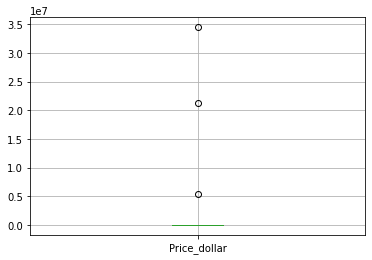

In [131]:
# Since we have just transformed the Price ranges we will have to recheck for missing values and outliers again
data.boxplot(column='Price_dollar')

There are 3 outliers present in the data.

In [132]:
# Pandas allows you to get quantiles using quantile function
Q1 = data['Price_dollar'].quantile(0.25)
Q3 = data['Price_dollar'].quantile(0.75)
IQR = Q3 - Q1

In [133]:
print('The IQR value is',IQR)

The IQR value is 4837.11397562633


In [134]:
# Let's see which entries are outliers
outliers=data[(data.Price_dollar < (Q1 - 1.5 * IQR)) |(data.Price_dollar > (Q3 + 1.5 * IQR))]

In [135]:
outliers

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
9,2020-08-16,10480,Pants,1 star,6914,Female,Prepaid Card,Prepaid Card,Express,19.0,£ 4032878.5368307503,British Pound,5.388958e+06
16,2020-08-17,10487,Pants,2 star,5783,Female,Credit Card,Credit Card,Economy,19.0,£ 25773831.320659,British Pound,3.444044e+07
29,2020-08-02,10500,Jeans,1 star,9410,Unspecified,Direct Deposit,Direct Deposit,Mail,5.0,"$21,312,321.13",American Dollar,2.131232e+07


In [136]:
data.drop([9,16,29],axis=0,inplace=True)

In [137]:
# lets try to filter entries with product type average expense is more than 6000
data.groupby('ProductType').filter(lambda val:val['Price_dollar'].mean()>6000)

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar


### Encoding

#### LabelEncoder

Scikit-learn(__sklearn__) is a famous machine learning library which provides a number of data preprocessing methods and machine learning algorithms. 


In [138]:
from sklearn.preprocessing import LabelEncoder

In [139]:
data[['CustomerID','ProductType','Rating','ShippingMode']].head(9)

,CustomerID,ProductType,Rating,ShippingMode
0,10471,Coats/Jackets,1 star,Economy
1,10472,Dresses,2 star,Mail
2,10473,Coats/Jackets,2 star,Mail
5,10476,Coats/Jackets,2 star,Mail
6,10477,Coats/Jackets,5 star,Mail
7,10478,Jeans,1 star,Mail
8,10479,Pants,4 star,Express
10,10481,Dresses,2 star,Economy
11,10482,Pants,5 star,Mail


In [140]:
encoded_data=data.copy()

In [141]:
le = LabelEncoder()

In [142]:
le.fit(encoded_data["Rating"])

LabelEncoder()

In [143]:
le.classes_

array(['1 star', '2 star', '3 star', '4 star', '5 star'], dtype=object)

In [144]:
encoded_data["Rating"]

0     1 star
1     2 star
2     2 star
5     2 star
6     5 star
       ...  
94    1 star
95    2 star
96    5 star
97    3 star
99    1 star
Name: Rating, Length: 88, dtype: object

In [145]:
converted_data = le.transform(encoded_data["Rating"])

In [146]:
converted_data

array([0, 1, 1, 1, 4, 0, 3, 1, 4, 3, 0, 0, 0, 4, 3, 0, 0, 3, 3, 1, 3, 3,
       0, 3, 3, 2, 3, 0, 2, 1, 0, 3, 0, 0, 3, 1, 0, 3, 2, 4, 1, 1, 3, 3,
       0, 0, 2, 4, 1, 0, 0, 1, 0, 1, 4, 3, 4, 0, 1, 1, 3, 0, 4, 3, 0, 1,
       3, 2, 2, 2, 4, 1, 4, 2, 3, 0, 0, 0, 4, 0, 1, 2, 1, 0, 1, 4, 2, 0])

In [147]:
le.fit(encoded_data["Rating"]).transform(encoded_data["Rating"])

array([0, 1, 1, 1, 4, 0, 3, 1, 4, 3, 0, 0, 0, 4, 3, 0, 0, 3, 3, 1, 3, 3,
       0, 3, 3, 2, 3, 0, 2, 1, 0, 3, 0, 0, 3, 1, 0, 3, 2, 4, 1, 1, 3, 3,
       0, 0, 2, 4, 1, 0, 0, 1, 0, 1, 4, 3, 4, 0, 1, 1, 3, 0, 4, 3, 0, 1,
       3, 2, 2, 2, 4, 1, 4, 2, 3, 0, 0, 0, 4, 0, 1, 2, 1, 0, 1, 4, 2, 0])

In [148]:
le.fit_transform(encoded_data["Rating"])

array([0, 1, 1, 1, 4, 0, 3, 1, 4, 3, 0, 0, 0, 4, 3, 0, 0, 3, 3, 1, 3, 3,
       0, 3, 3, 2, 3, 0, 2, 1, 0, 3, 0, 0, 3, 1, 0, 3, 2, 4, 1, 1, 3, 3,
       0, 0, 2, 4, 1, 0, 0, 1, 0, 1, 4, 3, 4, 0, 1, 1, 3, 0, 4, 3, 0, 1,
       3, 2, 2, 2, 4, 1, 4, 2, 3, 0, 0, 0, 4, 0, 1, 2, 1, 0, 1, 4, 2, 0])

In [149]:
le.classes_

array(['1 star', '2 star', '3 star', '4 star', '5 star'], dtype=object)

In [150]:
le.inverse_transform([2])

array(['3 star'], dtype=object)

In [151]:
encoded_data["LE"] = le.fit_transform(encoded_data["Rating"])
encoded_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar,LE
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751,0
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948,1
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780,1
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000,1
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807,4


#### Mapping

In [152]:
encoded_data=data.copy()

In [153]:
def map_rating(i):
    if i=='1 star':
        return 0
    elif i=='2 star':
        return 1
    elif i=='3 star':
        return 2
    elif i=='4 star':
        return 3
    elif i=='5 star':
        return 4
    else:
        return -1

In [154]:
encoded_data["Rating"]=encoded_data["Rating"].map(map_rating)

In [155]:
encoded_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,0,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751
1,2020-08-02,10472,Dresses,1,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948
2,2020-08-08,10473,Coats/Jackets,1,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780
5,2020-08-28,10476,Coats/Jackets,1,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,4,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807


#### OneHotEncoder

In [156]:
encoded_data=data.copy()

In [157]:
encoded_data[['CustomerID','ProductType','Rating','ShippingMode']].head()

,CustomerID,ProductType,Rating,ShippingMode
0,10471,Coats/Jackets,1 star,Economy
1,10472,Dresses,2 star,Mail
2,10473,Coats/Jackets,2 star,Mail
5,10476,Coats/Jackets,2 star,Mail
6,10477,Coats/Jackets,5 star,Mail


In [158]:
from sklearn.preprocessing import OneHotEncoder

In [159]:
encoded_data["Rating"].values.shape

(88,)

In [160]:
encoded_data["Rating"].values.reshape(-1,1).shape

(88, 1)

In [161]:
ohe = OneHotEncoder()
out = ohe.fit_transform(encoded_data["Rating"].values.reshape(-1,1)).toarray()
df_out = pd.DataFrame(out)
df_out.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [162]:
ohe.categories_

[array(['1 star', '2 star', '3 star', '4 star', '5 star'], dtype=object)]

In [163]:
lbe=LabelEncoder()

In [164]:
encoded_data['ProductType_lbl']=lbe.fit_transform(encoded_data.ProductType)

In [165]:
ohe=OneHotEncoder(handle_unknown='ignore')

In [166]:
encoded_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar,ProductType_lbl
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751,1
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948,2
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780,1
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000,1
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807,1


In [167]:
out=pd.DataFrame(ohe.fit_transform(encoded_data[['ProductType_lbl']]).toarray())

In [168]:
out

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0
84,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [169]:
lbe.classes_

array(['Cardigan', 'Coats/Jackets', 'Dresses', 'Hats', 'Jeans', 'Pants',
       'Shirts/Tops'], dtype=object)

In [170]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5, 6])]

In [171]:
# Merge the dataframe
encoded_data = encoded_data.join(out)

In [172]:
encoded_data.drop(['CustomerID','Rating','ShippingMode','Total_Ratings','Gender','PaymentMode',
                   'ShippingTime','Price','Price_dollar','PaidCurrency'],axis=1).head()

,Date,ProductType,PaymentMode.1,ProductType_lbl,0,1,2,3,4,5,6
0,2020-08-16,Coats/Jackets,Creditcard,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-02,Dresses,Ewallet,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-08-08,Coats/Jackets,Prepaid Card,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2020-08-28,Coats/Jackets,Direct Deposit,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2020-08-08,Coats/Jackets,Direct Deposit,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [173]:
import numpy as np
x = np.random.random((2,2))
x.shape

(2, 2)

In [174]:
x

array([[0.24552294, 0.86695642],
       [0.68375116, 0.45764563]])

In [175]:
a = x.reshape(1,-1)
a.shape

(1, 4)

In [176]:
x.shape

(2, 2)

In [177]:
b = x.reshape(-1,1)
b.shape

(4, 1)

In [178]:
b

array([[0.24552294],
       [0.86695642],
       [0.68375116],
       [0.45764563]])

In [179]:
y = np.random.random(5)
y.shape

(5,)

In [180]:
y

array([0.08789668, 0.74124492, 0.50728474, 0.64443276, 0.89409611])

In [181]:
y.reshape(-1,1)

array([[0.08789668],
       [0.74124492],
       [0.50728474],
       [0.64443276],
       [0.89409611]])

In [182]:
y.reshape(1,-1)

array([[0.08789668, 0.74124492, 0.50728474, 0.64443276, 0.89409611]])

#### Pandas Dummies

In [183]:
# We can simply do the similar thing using pandas dummies
encoded_data=data.copy()

In [184]:
encoded_data=pd.get_dummies(encoded_data,columns=['ProductType'])

In [185]:
encoded_data.drop(['CustomerID','Rating','ShippingMode','Total_Ratings','Gender','PaymentMode',
                   'ShippingTime','Price','Price_dollar','PaidCurrency'],axis=1).head()

,Date,PaymentMode.1,ProductType_Cardigan,ProductType_Coats/Jackets,ProductType_Dresses,ProductType_Hats,ProductType_Jeans,ProductType_Pants,ProductType_Shirts/Tops
0,2020-08-16,Creditcard,0,1,0,0,0,0,0
1,2020-08-02,Ewallet,0,0,1,0,0,0,0
2,2020-08-08,Prepaid Card,0,1,0,0,0,0,0
5,2020-08-28,Direct Deposit,0,1,0,0,0,0,0
6,2020-08-08,Direct Deposit,0,1,0,0,0,0,0


It is more convenient to use dummies as it reduces a lot of clutter in the code.

#### LabelBinarizer

In [186]:
from sklearn.preprocessing import LabelBinarizer

In [187]:
encoded_data=data.copy()

In [188]:
lbz=LabelBinarizer()

In [189]:
lbz.fit_transform(encoded_data.ProductType)[:5]

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

As you can see LabelBinarizer returns a 2D array just like OneHotEncoder

#### Target Encoding - LeaveOneOut Encoder

In [190]:
# Please wait while the library is installed
!pip install category-encoders --quiet  --disable-pip-version-check

     |████████████████████████████████| 82 kB 339 kB/s 


In [191]:
from category_encoders import LeaveOneOutEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [192]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807


In [193]:
X=data.drop('Price_dollar',axis=1)
y=data.Price_dollar

In [194]:
lo=LeaveOneOutEncoder(cols=['ShippingMode'])

In [195]:
lo.fit(X,y)

LeaveOneOutEncoder(cols=['ShippingMode'])

In [196]:
data[['CustomerID','ShippingMode']].head(5)

,CustomerID,ShippingMode
0,10471,Economy
1,10472,Mail
2,10473,Mail
5,10476,Mail
6,10477,Mail


In [197]:
lo.transform(X)[['CustomerID','ShippingMode']].head(5)

,CustomerID,ShippingMode
0,10471,4686.552032
1,10472,5445.464657
2,10473,5445.464657
5,10476,5445.464657
6,10477,5445.464657


### Scaling

#### StandardScaler

In [198]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807


In [199]:
data[['Total_Ratings','ShippingTime','Price_dollar']].agg([np.mean,max,min])

,Total_Ratings,ShippingTime,Price_dollar
mean,7626.375,12.770707,5094.166667
max,9965.000,20.000000,9962.440000
min,5024.000,5.000000,0.000000


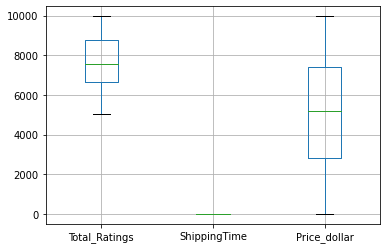

In [200]:
data[['Total_Ratings','ShippingTime','Price_dollar']].boxplot()

Clearly, there is difference is scales in features.

In [201]:
scaled_data=data.copy()

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
scl_tr=StandardScaler() # scaling total ratings
scl_st=StandardScaler() # scaling shipping time
scl_pd=StandardScaler() # scaling price in dollars

In [204]:
scaled_data.Total_Ratings=scl_tr.fit_transform(scaled_data[['Total_Ratings']])
scaled_data.ShippingTime=scl_st.fit_transform(scaled_data[['ShippingTime']])
scaled_data.Price_dollar=scl_pd.fit_transform(scaled_data[['Price_dollar']])

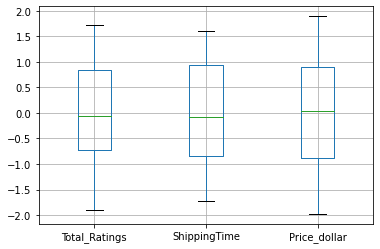

In [205]:
scaled_data[['Total_Ratings','ShippingTime','Price_dollar']].boxplot()

In [206]:
scaled_data.describe()

,CustomerID,Total_Ratings,ShippingTime,Price_dollar
count,88.000000,8.800000e+01,8.800000e+01,8.800000e+01
mean,10521.159091,-2.018587e-17,5.525883e-16,-1.614870e-16
std,28.238673,1.005731e+00,1.005731e+00,1.005731e+00
min,10471.000000,-1.908815e+00,-1.721324e+00,-1.978492e+00
25%,10496.750000,-7.242293e-01,-8.352663e-01,-8.804387e-01
50%,10521.500000,-6.372191e-02,-7.965572e-02,3.573812e-02
75%,10545.250000,8.340694e-01,9.368497e-01,9.078300e-01
max,10570.000000,1.715357e+00,1.601393e+00,1.890759e+00


#### MinMaxScaler

In [207]:
scaled_data=data.copy()

In [208]:
from sklearn.preprocessing import MinMaxScaler

In [209]:
mcl_tr=MinMaxScaler() # scaling total ratings
mcl_st=MinMaxScaler() # scaling shipping time
mcl_pd=MinMaxScaler() # scaling price in dollars

In [210]:
scaled_data.Total_Ratings=mcl_tr.fit_transform(scaled_data[['Total_Ratings']])
scaled_data.ShippingTime=mcl_st.fit_transform(scaled_data[['ShippingTime']])
scaled_data.Price_dollar=mcl_pd.fit_transform(scaled_data[['Price_dollar']])

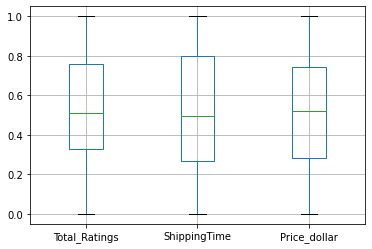

In [211]:
scaled_data[['Total_Ratings','ShippingTime','Price_dollar']].boxplot()

In [212]:
scaled_data.describe()

,CustomerID,Total_Ratings,ShippingTime,Price_dollar
count,88.000000,88.000000,88.000000,88.000000
mean,10521.159091,0.526690,0.518047,0.511337
std,28.238673,0.277506,0.302683,0.259929
min,10471.000000,0.000000,0.000000,0.000000
25%,10496.750000,0.326857,0.266667,0.283790
50%,10521.500000,0.509107,0.494074,0.520574
75%,10545.250000,0.756831,0.800000,0.745964
max,10570.000000,1.000000,1.000000,1.000000


MinMaxScaler scales data between 0-1

##### Saving Preprocessed DataFrame

In [217]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807


In [218]:
data.to_csv('Bello_Fashions_processed.csv',index=False)

### Pandas Profiling

**Pandas Profiling**

Official Documentation:

https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/getting_started.html

In [219]:
from pandas_profiling import ProfileReport

In [220]:
Profile = ProfileReport(data)
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [221]:
Profile.to_file("My_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Modin

Official Documentation:

https://modin.readthedocs.io/en/latest/

In [222]:
#!pip install modin[all]

In [223]:
#import modin.pandas as pd

### Advance Manipulation

#### Plotting and Styling

#### Plotting

In [224]:
data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,Price,PaidCurrency,Price_dollar
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.0,₹ 675036.2138626401,Indian Rupee,9073.161751
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.0,"€ 2,315.53",Euro,2596.859948
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee,8218.180780
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.0,<NA>,,0.000000
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound,8832.755807


In [225]:
def getCount(data,cat):
    '''
    data: DataFrame
    cat: category name  
    '''
    rre={'Category':[],'Length':[]}
    for grp,gata in data.groupby(cat):
        rre['Category'].append(grp)
        rre['Length'].append(len(gata))
    return pd.DataFrame(rre)

##### Most Popular Product Type

In [226]:
pt_count=getCount(data,'ProductType')
pt_count.set_index('Category',inplace=True)

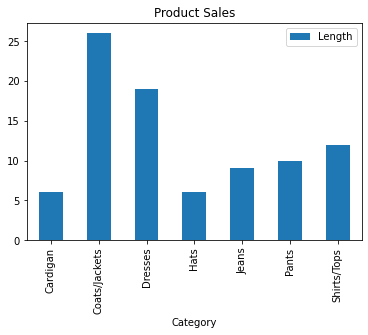

In [227]:
pt_count.plot(kind='bar',title='Product Sales')

##### Most Preferred Payment Mode

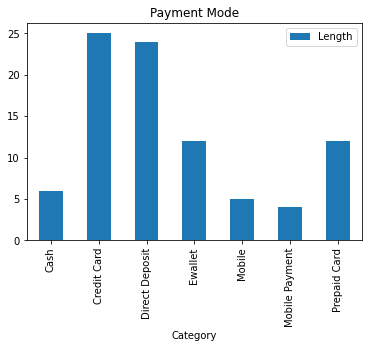

In [228]:
pt_count=getCount(data,'PaymentMode')
pt_count.set_index('Category',inplace=True)
pt_count.plot(kind='bar',title='Payment Mode')

##### Most Preferred Shipping Mode

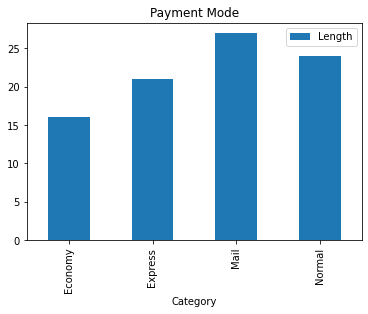

In [229]:
pt_count=getCount(data,'ShippingMode')
pt_count.set_index('Category',inplace=True)
pt_count.plot(kind='bar',title='Payment Mode')

##### Average Price/ShippingTime of products per category

In [230]:
aprice=data.groupby('ProductType')['Price_dollar'].agg(np.mean)

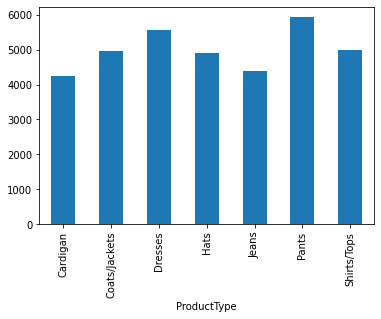

In [231]:
aprice.plot(kind='bar')

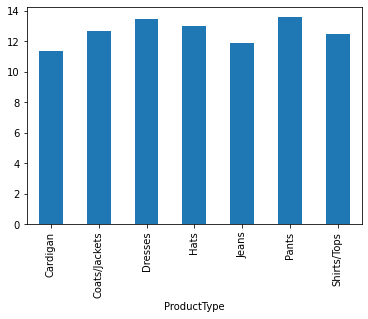

In [232]:
aship=data.groupby('ProductType')['ShippingTime'].agg(np.mean)
aship.plot(kind='bar')

##### Check the distribution of Shipping time

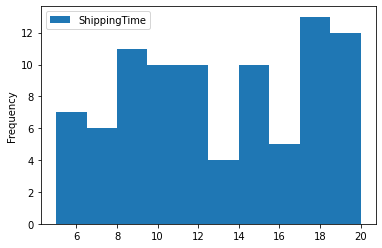

In [233]:
data[['ShippingTime']].plot.hist()

##### Pie Chart

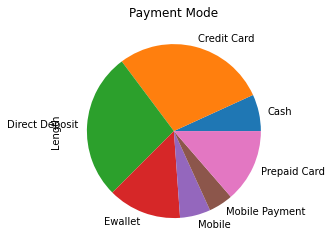

In [234]:
pt_count=getCount(data,'PaymentMode')
pt_count.set_index('Category',inplace=True)
pt_count.Length.plot.pie(title='Payment Mode')

#### Highlighting Price >5000

In [235]:
styled_data=data.head(10).style

In [236]:
styled_data=data.drop(['Date','Price'],axis=1).head(10).style
def price_range(price):
    out=[]
    for i in price:
        if float(i)>5000:
            # if price is greater than 5000 then color is light blue
            out.append("background-color : #e1eff6")
        else:
            # if price is less than 5000 then color is light pink
            out.append("background-color : #eccbd9")
    return out
styled_data.apply(price_range,subset=['Price_dollar'])

,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,PaidCurrency,Price_dollar
0,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.000000,Indian Rupee,9073.161751
1,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.000000,Euro,2596.859948
2,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.000000,Indian Rupee,8218.180780
5,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.000000,,0.000000
6,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.000000,British Pound,8832.755807
7,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Direct Deposit,Mail,18.000000,American Dollar,4287.060000
8,10479,Pants,4 star,9630,Male,Direct Deposit,Direct Deposit,Express,12.822222,British Pound,4022.414111
10,10481,Dresses,2 star,7750,Female,Direct Deposit,nan,Economy,17.000000,Euro,4152.387502
11,10482,Pants,5 star,7816,Female,Mobile Payment,Mobile Payment,Mail,10.000000,Euro,7379.674559
12,10483,Cardigan,4 star,7021,Unspecified,Cash,Cash,Express,6.000000,American Dollar,6756.940000


#### Styling whole table using CSS styles

In [237]:
styled_data=data.drop(['Date','Price'],axis=1).head(10).style


styles = [
    dict(selector="tr:hover",props=[("background-color", "#eccbd9")]),
    dict(selector="th:hover",props=[("background-color", "#eccbd9")]),
    dict(selector="th", props=[('background-color','#4f6d7a'),
                               ("font-size", "12px"),
                               ("text-align", "center"),
                               ('color', '#ffffff'),
                              ('border','1px solid #dbe9ee')]),
    dict(selector='tbody', props=[('color', '#449dd1'),]),
    dict(selector='tr', props=[('background-color','#e1eff6'),
                                ('color', '#449dd1'),
                                ('font-family','Helvetica')]),
    dict(selector='td',props=[('border','1px solid #166088'),
                             ("font-size", "10px")])
]

styled_data.set_table_styles(styles)

,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,PaidCurrency,Price_dollar
0,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.000000,Indian Rupee,9073.161751
1,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.000000,Euro,2596.859948
2,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.000000,Indian Rupee,8218.180780
5,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.000000,,0.000000
6,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.000000,British Pound,8832.755807
7,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Direct Deposit,Mail,18.000000,American Dollar,4287.060000
8,10479,Pants,4 star,9630,Male,Direct Deposit,Direct Deposit,Express,12.822222,British Pound,4022.414111
10,10481,Dresses,2 star,7750,Female,Direct Deposit,nan,Economy,17.000000,Euro,4152.387502
11,10482,Pants,5 star,7816,Female,Mobile Payment,Mobile Payment,Mail,10.000000,Euro,7379.674559
12,10483,Cardigan,4 star,7021,Unspecified,Cash,Cash,Express,6.000000,American Dollar,6756.940000


#### Magnification

In [238]:
styled_data=data.drop(['Date','Price'],axis=1).head(10).style

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "4px 4px"),]),
            dict(selector="th:hover",
                 props=[("font-size", "13pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '14pt'),
                       ('color', '#4f6d7a')])]




styles = [
    dict(selector="tr:hover",props=[("background-color", "#eccbd9")]),
    dict(selector="th:hover",props=[("background-color", "#eccbd9")]),
    dict(selector="th", props=[('background-color','#4f6d7a'),
                               ("font-size", "120%"),
                               ("text-align", "center"),
                               ('color', '#ffffff'),
                              ('border','1px solid #dbe9ee')]),
    dict(selector='tbody', props=[('color', '#449dd1'),]),
    dict(selector='tr', props=[('background-color','#e1eff6'),
                                ('color', '#449dd1'),
                                ('font-family','Helvetica')]),
    dict(selector='td',props=[('border','1px solid #166088'),])]

styles.extend(magnify())
styled_data.set_table_styles(styles)

,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,PaymentMode.1,ShippingMode,ShippingTime,PaidCurrency,Price_dollar
0,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Creditcard,Economy,17.000000,Indian Rupee,9073.161751
1,10472,Dresses,2 star,8547,Unspecified,Ewallet,Ewallet,Mail,12.000000,Euro,2596.859948
2,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Prepaid Card,Mail,10.000000,Indian Rupee,8218.180780
5,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Direct Deposit,Mail,20.000000,,0.000000
6,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Direct Deposit,Mail,14.000000,British Pound,8832.755807
7,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Direct Deposit,Mail,18.000000,American Dollar,4287.060000
8,10479,Pants,4 star,9630,Male,Direct Deposit,Direct Deposit,Express,12.822222,British Pound,4022.414111
10,10481,Dresses,2 star,7750,Female,Direct Deposit,nan,Economy,17.000000,Euro,4152.387502
11,10482,Pants,5 star,7816,Female,Mobile Payment,Mobile Payment,Mail,10.000000,Euro,7379.674559
12,10483,Cardigan,4 star,7021,Unspecified,Cash,Cash,Express,6.000000,American Dollar,6756.940000
